In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Read the data
data = pd.read_csv("C:\\Users\\Utsav Sharma\\OneDrive\\Desktop\\data.csv")
data

,Date,Time,Room Temperature,Outside Temperature,Relative Humidity,Solar Irradiance,Number of Occupants,Energy Consumption,Light Consumption,HVAC Consumption,Additional Equipment Consumption,Energy Cost($)
0,23/03/2021,8:00,23.7,21.6,46,204,5,160,30,70,2,0.0384
1,23/03/2021,9:00,23.5,22.9,48,376,40,330,20,250,10,0.0792
2,23/03/2021,10:00,23.5,22.9,47,432,35,400,20,300,7,0.0960
3,23/03/2021,11:00,23.1,23.2,48,437,50,560,20,500,12,0.1344
4,23/03/2021,12:00,23.0,25.2,48,615,60,700,5,550,20,0.1680
...,...,...,...,...,...,...,...,...,...,...,...,...
604,9/05/2021,16:00,23.5,27.3,46,561,40,620,30,550,10,0.1800
605,9/05/2021,17:00,23.6,27.5,47,429,50,650,50,560,15,0.1560
606,9/05/2021,18:00,23.6,26.0,47,235,80,1040,60,900,30,0.2496
607,9/05/2021,19:00,23.2,25.0,46,53,60,700,60,500,22,0.1680


In [3]:
# Shape of our dataset
data.shape

# Info our dataset
data.info()

# Describe our dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              609 non-null    object 
 1   Time                              609 non-null    object 
 2   Room Temperature                  609 non-null    float64
 3   Outside Temperature               609 non-null    float64
 4   Relative Humidity                 609 non-null    int64  
 5   Solar Irradiance                  609 non-null    int64  
 6   Number of Occupants               609 non-null    int64  
 7   Energy Consumption                609 non-null    int64  
 8   Light Consumption                 609 non-null    int64  
 9   HVAC Consumption                  609 non-null    int64  
 10  Additional Equipment Consumption  609 non-null    int64  
 11  Energy Cost($)                    609 non-null    float64
dtypes: float

,Room Temperature,Outside Temperature,Relative Humidity,Solar Irradiance,Number of Occupants,Energy Consumption,Light Consumption,HVAC Consumption,Additional Equipment Consumption,Energy Cost($)
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,22.575041,25.759113,46.735632,509.699507,43.916256,577.912972,26.510673,471.822660,13.344828,0.139783
std,0.815859,1.643904,1.755835,287.961089,18.645971,227.191123,21.892763,204.985866,7.359829,0.054006
min,20.000000,21.600000,41.000000,0.000000,5.000000,140.000000,0.000000,70.000000,1.000000,0.033600
25%,22.300000,24.700000,46.000000,294.000000,35.000000,450.000000,5.000000,300.000000,10.000000,0.100800
50%,22.600000,25.900000,47.000000,521.000000,50.000000,600.000000,20.000000,500.000000,12.000000,0.144000
75%,23.100000,27.200000,48.000000,773.000000,60.000000,700.000000,50.000000,600.000000,16.000000,0.168000
max,24.000000,29.000000,49.000000,911.000000,80.000000,1055.000000,60.000000,950.000000,34.000000,0.252000


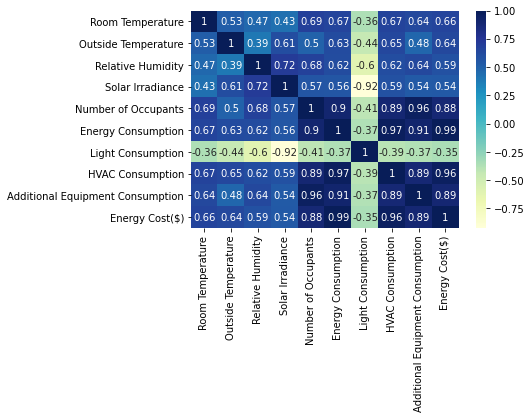

In [4]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

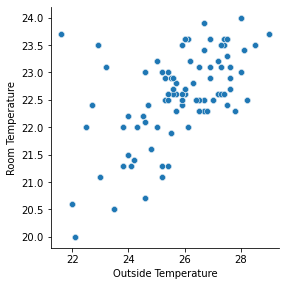

In [5]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Outside Temperature'], 
             y_vars='Room Temperature', height=4, aspect=1, kind='scatter')
plt.show()

In [24]:
# Creating X and y
X = data['Outside Temperature']
y = data['Room Temperature']

In [25]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
# Take a look at the train dataset
X_train
y_train

37    22.0
42    22.6
74    22.9
21    23.6
51    20.5
      ... 
48    22.6
79    22.6
67    22.6
24    21.1
8     22.0
Name: Room Temperature, Length: 62, dtype: float64

In [27]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [28]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                  17.184197
Outside Temperature     0.210062
dtype: float64

In [29]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Room Temperature   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     13.59
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           0.000491
Time:                        16:07:22   Log-Likelihood:                -68.663
No. Observations:                  62   AIC:                             141.3
Df Residuals:                      60   BIC:                             145.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  17.1842      1.470     11.689      0.000      14.244      20.125
Outside Temperature     0.2101      0.057      3.686      0.000       0.096       0.324
==============================================================================
Omnibus:                        0.966   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.368
Skew:                           0.031   Prob(JB):                        0.832
Kurtosis:                       3.372   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

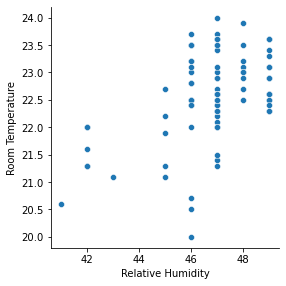

In [16]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Relative Humidity'], 
             y_vars='Room Temperature', height=4, aspect=1, kind='scatter')
plt.show()

In [17]:
# Creating X and y
X = data['Relative Humidity']
y = data['Room Temperature']

In [18]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [20]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                12.393919
Relative Humidity     0.218328
dtype: float64

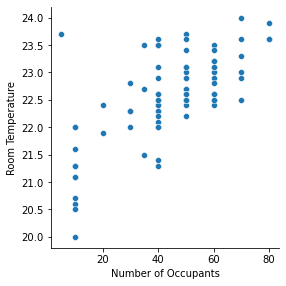

In [30]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Number of Occupants'], 
             y_vars='Room Temperature', height=4, aspect=1, kind='scatter')
plt.show()

In [31]:
# Creating X and y
X = data['Number of Occupants']
y = data['Room Temperature']

In [32]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [34]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                  21.344192
Number of Occupants     0.029248
dtype: float64

In [35]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Room Temperature   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     39.53
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           4.05e-08
Time:                        16:09:23   Log-Likelihood:                -59.303
No. Observations:                  62   AIC:                             122.6
Df Residuals:                      60   BIC:                             126.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.3442      0.214     99.522      0.000      20.915      21.773
Number of Occupants     0.0292      0.005      6.287      0.000       0.020       0.039
==============================================================================
Omnibus:                        7.759   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                9.115
Skew:                           0.494   Prob(JB):                       0.0105
Kurtosis:                       4.598   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

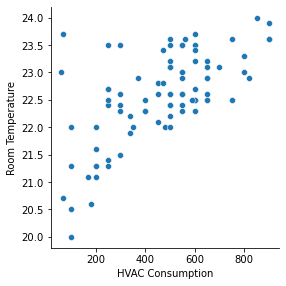

In [36]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['HVAC Consumption'], 
             y_vars='Room Temperature', height=4, aspect=1, kind='scatter')
plt.show()

In [37]:
# Creating X and y
X = data['HVAC Consumption']
y = data['Room Temperature']

In [38]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [40]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const               21.431008
HVAC Consumption     0.002565
dtype: float64

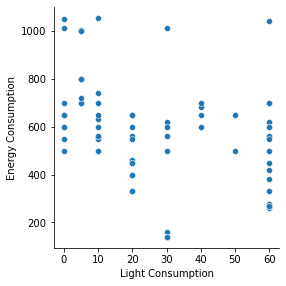

In [42]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Light Consumption'], 
             y_vars='Energy Consumption', height=4, aspect=1, kind='scatter')
plt.show()

In [43]:
# Creating X and y
X = data['Light Consumption']
y = data['Energy Consumption']

In [44]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [46]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                664.422544
Light Consumption     -3.704880
dtype: float64

In [47]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Energy Consumption   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     12.13
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           0.000933
Time:                        16:19:02   Log-Likelihood:                -410.65
No. Observations:                  62   AIC:                             825.3
Df Residuals:                      60   BIC:                             829.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               664.4225     37.196     17.863      0.000     590.020     738.825
Light Consumption    -3.7049      1.064     -3.483      0.001      -5.833      -1.577
==============================================================================
Omnibus:                        0.118   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.004
Skew:                          -0.014   Prob(JB):                        0.998
Kurtosis:                       2.973   Cond. No.                         55.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

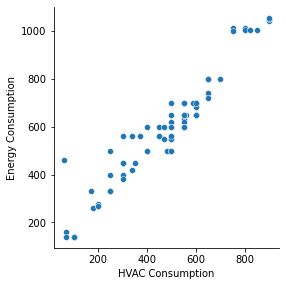

In [48]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['HVAC Consumption'], 
             y_vars='Energy Consumption', height=4, aspect=1, kind='scatter')
plt.show()

In [49]:
# Creating X and y
X = data['HVAC Consumption']
y = data['Energy Consumption']

In [50]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [52]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const               114.000919
HVAC Consumption      0.994367
dtype: float64

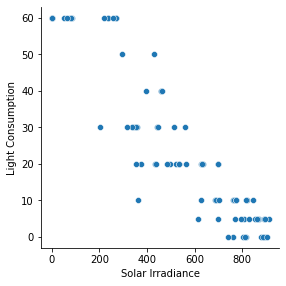

In [60]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Solar Irradiance'], 
             y_vars='Light Consumption', height=4, aspect=1, kind='scatter')
plt.show()

In [61]:
# Creating X and y
X = data['Solar Irradiance']
y = data['Light Consumption']

In [62]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [63]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [64]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const               62.404971
Solar Irradiance    -0.071158
dtype: float64

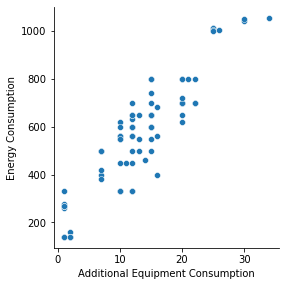

In [66]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Additional Equipment Consumption'], 
             y_vars='Energy Consumption', height=4, aspect=1, kind='scatter')
plt.show()

In [67]:
# Creating X and y
X = data['Additional Equipment Consumption']
y = data['Energy Consumption']

In [68]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [69]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [70]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                               227.543620
Additional Equipment Consumption     26.474994
dtype: float64

In [71]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Energy Consumption   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.01e-23
Time:                        16:34:22   Log-Likelihood:                -363.90
No. Observations:                  62   AIC:                             731.8
Df Residuals:                      60   BIC:                             736.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              227.5436     23.412      9.719      0.000     180.713     274.374
Additional Equipment Consumption    26.4750      1.624     16.307      0.000      23.227      29.723
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.307
Skew:                          -0.399   Prob(JB):                        0.315
Kurtosis:                       2.494   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

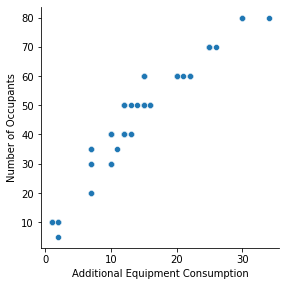

In [72]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Additional Equipment Consumption'], 
             y_vars='Number of Occupants', height=4, aspect=1, kind='scatter')
plt.show()

In [73]:
# Creating X and y
X = data['Additional Equipment Consumption']
y = data['Number of Occupants']

In [74]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [75]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [76]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                               11.501346
Additional Equipment Consumption     2.451671
dtype: float64

In [77]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number of Occupants   R-squared:                       0.913
Model:                             OLS   Adj. R-squared:                  0.912
Method:                  Least Squares   F-statistic:                     630.9
Date:                 Sat, 25 Sep 2021   Prob (F-statistic):           1.56e-33
Time:                         16:38:42   Log-Likelihood:                -189.59
No. Observations:                   62   AIC:                             383.2
Df Residuals:                       60   BIC:                             387.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               11.5013      1.408      8.171      0.000       8.686      14.317
Additional Equipment Consumption     2.4517      0.098     25.117      0.000       2.256       2.647
==============================================================================
Omnibus:                        2.152   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.450
Skew:                           0.128   Prob(JB):                        0.484
Kurtosis:                       3.704   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

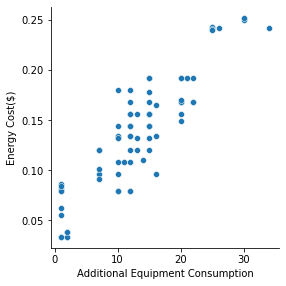

In [79]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Additional Equipment Consumption'], 
             y_vars='Energy Cost($)', height=4, aspect=1, kind='scatter')
plt.show()

In [80]:
# Creating X and y
X = data['Additional Equipment Consumption']
y = data['Energy Cost($)']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                               0.059177
Additional Equipment Consumption    0.006047
dtype: float64

In [81]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Energy Cost($)   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     206.2
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           4.50e-21
Time:                        16:52:00   Log-Likelihood:                 148.04
No. Observations:                  62   AIC:                            -292.1
Df Residuals:                      60   BIC:                            -287.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0592      0.006      9.745      0.000       0.047       0.071
Additional Equipment Consumption     0.0060      0.000     14.359      0.000       0.005       0.007
==============================================================================
Omnibus:                        1.717   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.512
Skew:                          -0.244   Prob(JB):                        0.470
Kurtosis:                       2.411   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

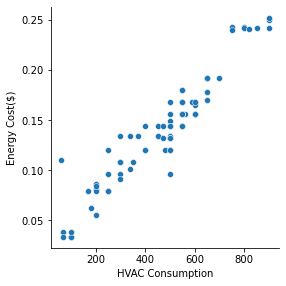

In [82]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['HVAC Consumption'], 
             y_vars='Energy Cost($)', height=4, aspect=1, kind='scatter')
plt.show()

In [83]:
# Creating X and y
X = data['HVAC Consumption']
y = data['Number of Occupants']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number of Occupants   R-squared:                       0.692
Model:                             OLS   Adj. R-squared:                  0.687
Method:                  Least Squares   F-statistic:                     134.9
Date:                 Sat, 25 Sep 2021   Prob (F-statistic):           5.46e-17
Time:                         16:54:27   Log-Likelihood:                -228.82
No. Observations:                   62   AIC:                             461.6
Df Residuals:                       60   BIC:                             465.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.8548      3.248      2.419      0.019       1.359      14.351
HVAC Consumption     0.0769      0.007     11.615      0.000       0.064       0.090
==============================================================================
Omnibus:                       14.868   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.902
Skew:                           0.956   Prob(JB):                     7.86e-05
Kurtosis:                       4.912   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

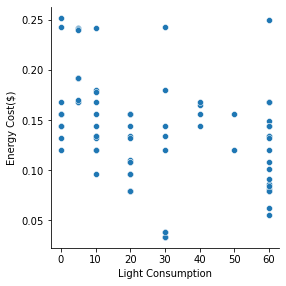

In [84]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Light Consumption'], 
             y_vars='Energy Cost($)', height=4, aspect=1, kind='scatter')
plt.show()

In [85]:
# Creating X and y
X = data['Light Consumption']
y = data['Energy Cost($)']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Energy Cost($)   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     10.27
Date:                Sat, 25 Sep 2021   Prob (F-statistic):            0.00217
Time:                        16:57:08   Log-Likelihood:                 106.76
No. Observations:                  62   AIC:                            -209.5
Df Residuals:                      60   BIC:                            -205.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1580      0.009     17.883      0.000       0.140       0.176
Light Consumption    -0.0008      0.000     -3.205      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.129
Skew:                          -0.111   Prob(JB):                        0.938
Kurtosis:                       2.979   Cond. No.                         55.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

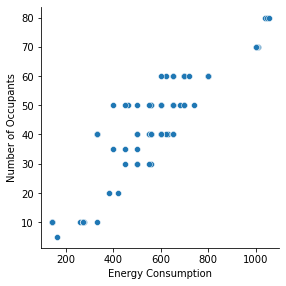

In [86]:

# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Energy Consumption'], 
             y_vars='Number of Occupants', height=4, aspect=1, kind='scatter')
plt.show()

In [87]:
# Creating X and y
X = data['Energy Consumption']
y = data['Number of Occupants']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number of Occupants   R-squared:                       0.785
Model:                             OLS   Adj. R-squared:                  0.782
Method:                  Least Squares   F-statistic:                     219.3
Date:                 Sat, 25 Sep 2021   Prob (F-statistic):           1.06e-21
Time:                         17:02:51   Log-Likelihood:                -217.68
No. Observations:                   62   AIC:                             439.4
Df Residuals:                       60   BIC:                             443.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0859      3.134     -0.346      0.730      -7.355       5.183
Energy Consumption     0.0776      0.005     14.807      0.000       0.067       0.088
==============================================================================
Omnibus:                        4.434   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.345
Skew:                           0.434   Prob(JB):                        0.188
Kurtosis:                       2.263   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

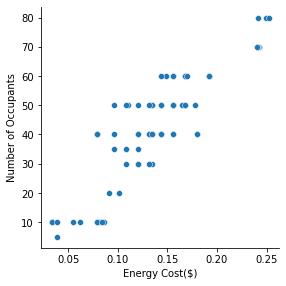

In [89]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Energy Cost($)'], 
             y_vars='Number of Occupants', height=4, aspect=1, kind='scatter')
plt.show()

In [90]:
# Creating X and y
X = data['Energy Cost($)']
y = data['Number of Occupants']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number of Occupants   R-squared:                       0.739
Model:                             OLS   Adj. R-squared:                  0.735
Method:                  Least Squares   F-statistic:                     169.9
Date:                 Sat, 25 Sep 2021   Prob (F-statistic):           3.73e-19
Time:                         17:04:09   Log-Likelihood:                -223.70
No. Observations:                   62   AIC:                             451.4
Df Residuals:                       60   BIC:                             455.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.0065      3.543     -0.284      0.777      -8.093       6.080
Energy Cost($)   321.0030     24.625     13.036      0.000     271.745     370.261
==============================================================================
Omnibus:                        2.159   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                1.392
Skew:                           0.056   Prob(JB):                        0.498
Kurtosis:                       2.274   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

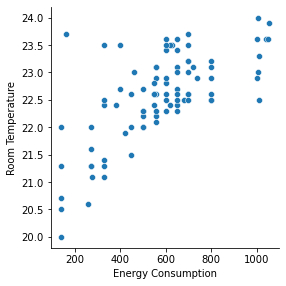

In [92]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Energy Consumption'], 
             y_vars='Room Temperature', height=4, aspect=1, kind='scatter')
plt.show()

In [93]:
# Creating X and y
X = data['Energy Consumption']
y = data['Room Temperature']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Room Temperature   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     45.30
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           7.20e-09
Time:                        17:09:25   Log-Likelihood:                -57.555
No. Observations:                  62   AIC:                             119.1
Df Residuals:                      60   BIC:                             123.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 21.0891      0.237     89.032      0.000      20.615      21.563
Energy Consumption     0.0027      0.000      6.730      0.000       0.002       0.003
==============================================================================
Omnibus:                       13.330   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.340
Skew:                           0.876   Prob(JB):                     0.000283
Kurtosis:                       4.804   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

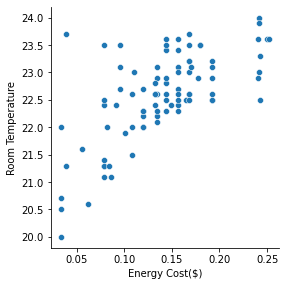

In [95]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Energy Cost($)'], 
             y_vars='Room Temperature', height=4, aspect=1, kind='scatter')
plt.show()

In [96]:
# Creating X and y
X = data['Energy Cost($)']
y = data['Room Temperature']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Room Temperature   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     40.76
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           2.78e-08
Time:                        17:13:20   Log-Likelihood:                -58.921
No. Observations:                  62   AIC:                             121.8
Df Residuals:                      60   BIC:                             126.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.0926      0.248     84.926      0.000      20.596      21.589
Energy Cost($)    11.0220      1.726      6.384      0.000       7.569      14.475
==============================================================================
Omnibus:                       11.470   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.907
Skew:                           0.806   Prob(JB):                      0.00157
Kurtosis:                       4.549   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

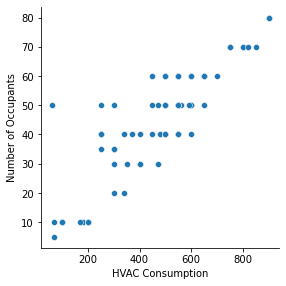

In [97]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['HVAC Consumption'], 
             y_vars='Number of Occupants', height=4, aspect=1, kind='scatter')
plt.show()

In [98]:
# Creating X and y
X = data['HVAC Consumption']
y = data['Number of Occupants']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number of Occupants   R-squared:                       0.692
Model:                             OLS   Adj. R-squared:                  0.687
Method:                  Least Squares   F-statistic:                     134.9
Date:                 Sat, 25 Sep 2021   Prob (F-statistic):           5.46e-17
Time:                         17:16:25   Log-Likelihood:                -228.82
No. Observations:                   62   AIC:                             461.6
Df Residuals:                       60   BIC:                             465.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.8548      3.248      2.419      0.019       1.359      14.351
HVAC Consumption     0.0769      0.007     11.615      0.000       0.064       0.090
==============================================================================
Omnibus:                       14.868   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.902
Skew:                           0.956   Prob(JB):                     7.86e-05
Kurtosis:                       4.912   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

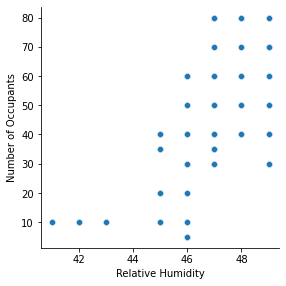

In [6]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Relative Humidity'], 
             y_vars='Number of Occupants', height=4, aspect=1, kind='scatter')
plt.show()

In [7]:
# Creating X and y
X = data['Relative Humidity']
y = data['Number of Occupants']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number of Occupants   R-squared:                       0.464
Model:                             OLS   Adj. R-squared:                  0.463
Method:                  Least Squares   F-statistic:                     366.9
Date:                 Fri, 01 Oct 2021   Prob (F-statistic):           2.23e-59
Time:                         01:58:37   Log-Likelihood:                -1720.0
No. Observations:                  426   AIC:                             3444.
Df Residuals:                      424   BIC:                             3452.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -286.9660     17.252    -16.634      0.000    -320.875    -253.057
Relative Humidity     7.0672      0.369     19.156      0.000       6.342       7.792
==============================================================================
Omnibus:                        6.334   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.136
Skew:                          -0.271   Prob(JB):                       0.0465
Kurtosis:                       3.228   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""